In [36]:
##Correlation analysis: 
#(Generalized linear mixed effect models) 

#Type of Motivation - > using sport apps (wether? how often? What for?)

#Age (Median or continuous variable) and motivation -> use of sport apps 

#Reason for people using app - > how often they are using sport app 



In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [38]:
data = pd.read_csv("data.csv")
data


,Unnamed: 0,Gender,Age,Sport Frequency,Type of Sport,Ever used Sportapp,Frequency Sportapp,Reason sportapp,Goals more efficient through sportapp,Motivation when comparing to friends,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,0,Weiblich,22,5,"Joggen, Ballsportarten (z.B. Fußball, Handball...",Ja,1,"Zum Tracken meiner Leistungen, Um mir Ziele zu...",Ja,Nein,1.25,2.75,4.00,3.50,4.25,4.25
1,1,Weiblich,23,3,"Fitness-Kurse, Tanzen",Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,3.00,3.00,4.00,3.75,3.25,3.50
2,2,Weiblich,25,3,"Joggen, Kraftsport, Ballsportarten (z.B. Fußba...",Ja,1,Zum Tracken meiner Leistungen,Ja,Nein,1.25,2.00,4.50,3.00,4.25,4.25
3,3,Weiblich,18,3,"Kraftsport, Ballsportarten (z.B. Fußball, Hand...",Ja,1,"Zum Tracken meiner Leistungen, Um einen Sport-...",Ja,Nein,1.50,2.25,3.25,3.75,5.00,4.00
4,4,Weiblich,18,1,"Ballsportarten (z.B. Fußball, Handball, Basket...",Ja,0,Zum Tracken meiner Leistungen,Ja,Nein,2.25,2.00,3.00,3.00,3.75,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,107,Weiblich,31,5,"Joggen, Yoga",Ja,2,"Zum Tracken meiner Leistungen, Um Kurse zu Buchen",Ja,Ja,2.25,2.75,3.75,2.50,3.75,3.50
103,108,Weiblich,65,5,Walken,Nein,0,Benutze keine Sportapp,Nein,Nein,1.00,1.00,2.00,1.00,1.00,1.00
104,110,Weiblich,64,3,Fitness-Kurse,Ja,1,"Zum Tracken meiner Leistungen, Um Kurse zu Buc...",Ja,Nein,1.50,2.00,4.75,3.50,3.50,4.25
105,111,Männlich,24,3,Badminton,Ja,1,"Zum Tracken meiner Leistungen, Um das Training...",Ja,Ja,2.50,2.25,3.75,3.50,3.75,4.25


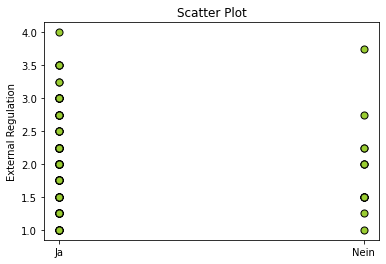

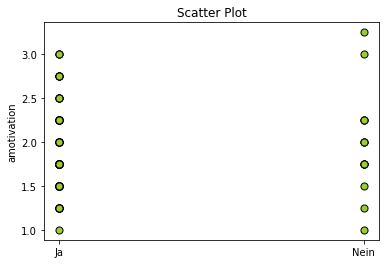

In [39]:
#External Regulation

plt.scatter(data['Ever used Sportapp'], data['External Regulation'], s=50, c='#9ACD32', edgecolor='black', marker='o')
# Add labels and title
plt.ylabel('External Regulation')
plt.title('Scatter Plot')
labels = ['Ja', 'Nein']
plt.xticks(range(0, 2), labels)
# Show the plot
plt.show()

#amotivation
plt.scatter(data['Ever used Sportapp'], data['Amotivation'], s=50, c='#9ACD32', edgecolor='black', marker='o')
 
# Add labels and title
plt.ylabel('amotivation')
plt.title('Scatter Plot')
 
labels = ['Ja', 'Nein']
plt.xticks(range(0, 2), labels)
 
# Show the plot
plt.show()

In [76]:
meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()

meandata

<ipython-input-76-b9c6226b00bb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,Ever used Sportapp,Amotivation,External Regulation,Introjected Regulation,Identified Regulation,Integrated Regulation,Intrinsic Motivation
0,Ja,1.877717,2.065217,3.793478,3.190217,3.888587,3.782609
1,Nein,1.983333,1.883333,3.466667,2.566667,3.366667,3.083333


In [77]:
meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()
meandata= meandata.transpose()

meandata

<ipython-input-77-7a6a6a043b9c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  meandata = data.groupby('Ever used Sportapp',as_index=False)['Amotivation','External Regulation','Introjected Regulation','Identified Regulation','Integrated Regulation','Intrinsic Motivation'].mean()


,0,1
Ever used Sportapp,Ja,Nein
Amotivation,1.877717,1.983333
External Regulation,2.065217,1.883333
Introjected Regulation,3.793478,3.466667
Identified Regulation,3.190217,2.566667
Integrated Regulation,3.888587,3.366667
Intrinsic Motivation,3.782609,3.083333


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


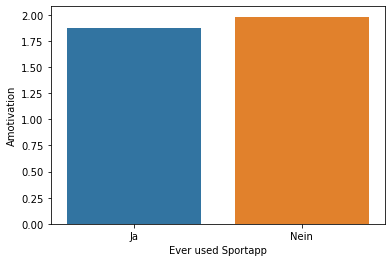

In [74]:
p = sns.barplot('Ever used Sportapp','Amotivation',data=meandata,ci=False)

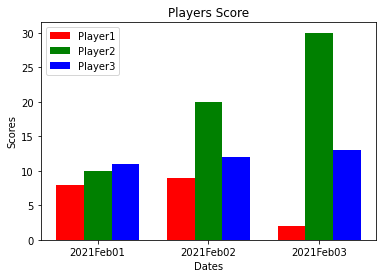

In [78]:
X = ['Group A','Group B','Group C','Group D']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()